In [1]:
# %load_ext nb_black
# Autoformat cells

# Preliminaries

We load titanic dataset using pandas.
Titanic dataset can be obtained [here](https://www.kaggle.com/competitions/titanic/data)

In [2]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Data Cleaning and Exploratory Data Analysis


### `dss_toolkit.helpers.pandas.show()`

"Fully display a Pandas DataFrame." Use `n_decimals` parameter to specify number of decimal figures. Default is scientific notation


In [3]:
from dss_toolkit.helpers.pandas import show

show(train.head(200),n_decimals=None)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


# Doing a quick summary of the dataframe

### `dss_toolkit.data_build.cleaning.eda_categorical_cols()`
### `dss_toolkit.data_build.cleaning.eda_numeric_cols()`

In [4]:
from dss_toolkit.data_analysis.eda import eda_categorical_cols, eda_numeric_cols

categorical_variables = ["Name", "Sex", "Ticket", "Cabin", "Embarked"]
numeric_variables = [
    "PassengerId",
    "Survived",
    "Pclass",
    "Age",
    "SibSp",
    "Parch",
    "Fare",
]

target_variable = "Survived"
feature_variables = list(numeric_variables + categorical_variables).remove(
    target_variable
)

In [5]:
eda_categorical_cols(train, categorical_cols=categorical_variables)

,column_name,nunique,unique_vals,val_count,dtypes
0,Name,891,"[Petroff, Mr. Pastcho (""Pentcho""), Harder, Mr....","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",object
1,Sex,2,"[male, female]","[577, 314]",object
2,Ticket,681,"[CA. 2343, 1601, 347082, CA 2144, 3101295, 347...","[7, 7, 7, 6, 6, 6, 5, 5, 4, 4, 4, 4, 4, 4, 4, ...",object
3,Cabin,147,"[B96 B98, G6, C23 C25 C27, F2, C22 C26, E101, ...","[4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, ...",object
4,Embarked,3,"[S, C, Q]","[644, 168, 77]",object


In [6]:
eda_numeric_cols(train, numeric_cols=numeric_variables)

,column_name,min_value,q05,q25,q50,q75,q95,max_value,mean_value,count,dtypes
0,PassengerId,1.00,45.500,223.5000,446.0000,668.5,846.50000,891.0000,446.000000,891,int64
1,Survived,0.00,0.000,0.0000,0.0000,1.0,1.00000,1.0000,0.383838,891,int64
2,Pclass,1.00,1.000,2.0000,3.0000,3.0,3.00000,3.0000,2.308642,891,int64
3,Age,0.42,4.000,20.1250,28.0000,38.0,56.00000,80.0000,29.699118,714,float64
4,SibSp,0.00,0.000,0.0000,0.0000,1.0,3.00000,8.0000,0.523008,891,int64
5,Parch,0.00,0.000,0.0000,0.0000,0.0,2.00000,6.0000,0.381594,891,int64
6,Fare,0.00,7.225,7.9104,14.4542,31.0,112.07915,512.3292,32.204208,891,float64


# Data Cleaning
---

In [7]:
from dss_toolkit.data_build.cleaning import (
    qa_values,
    qa_strip_whitespace,
    replace_low_cardinality,
    replace_iqr_outlier,
)
from dss_toolkit.data_analysis.eda import eda_categorical_cols, eda_numeric_cols


## Removing Whitespaces using `qa_strip_whitespace()`

In [8]:
# Remove white spaces, replace empty string with nan
for c in categorical_variables:
    qa_strip_whitespace(train, c, replace_nan=True, inplace=True)

# Insert impuation afterwards

# Fixing invalid Values with `qa_values()`

```
    dss_toolkit.data_build.cleaning.qa_values(df, column, mode="replace", possible_values=[], min_value=None, max_value=None, replacement=None, inplace=False )
```
Parameters
    -----------------
    df : Dataframe
    column : str
        Name of the column to clean
    mode : str ("replace" or "drop") Default: replace
        replace :  repalce values with the parameter `replacement` (default: `None`)
        drop: drop rows with invalid values
    possible_values: list
        List of possible values for categorical variable
    min_value:  numeric (default: None)
        Minimum value for numeric variable
    max_value: numeric (default: None)
        Maximum value for numeric variable
    replacement: str or numeric (default: None)
        If `mode="replace"`, replaces invalid values with this value
    inplace: boolean (default: False)
        returns a copy if set to `True`
        
Sample
-----
```
qa_values(train, "Age", min_value=0, max_value=100)  # Replace invalid with NA
qa_values(train, "Age", min_value=0, max_value=100, mode="drop")  # Drop invalid
qa_values(train, "Age", min_value=0, max_value=100, mode="replace", replacement=0)
qa_values(
    train,
    "Age",
    min_value=0,
    max_value=100,
    mode="replace",
    replacement=train.Age.mean(),
)
```

In [9]:
# Set limits for numeric column
qa_values(train, "Age", min_value=0, max_value=100)  # Replace invalid with NA
qa_values(train, "Age", min_value=0, max_value=100, mode="drop")  # Drop invalid
qa_values(train, "Age", min_value=0, max_value=100, mode="replace", replacement=0)
qa_values(
    train,
    "Age",
    min_value=0,
    max_value=100,
    mode="replace",
    replacement=train.Age.mean(),
)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
# Set limits for categorical values
qa_values(
    train, "Sex", possible_values=["male", "female"]
)  # Default is replace with None

qa_values(train, "Sex", possible_values=["male", "female"], replacement="Other")



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Outlier Treatment

In [11]:
replace_iqr_outlier(train, "Fare")  # Replace outliers with 5th and 95 percentile values
replace_iqr_outlier(train, "Fare", mode="cap")  # Replace outliers with 1.5IQR
replace_iqr_outlier(train, "Fare", mode=None)  # Replace outliers with np.none

replace_iqr_outlier(
    train, "Fare", quantile_range=(0.25, 0.75), replacement_range=(0.05, 0.95)
)  # Customize IQR and replacement values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,112.07915,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00000,C148,C



# Visualizations
-----

In [12]:
from dss_toolkit.data_analysis.visualization import (
    plt_scatter,
    plt_hist,
    plt_boxplot,
    plt_boxplot2,
    plt_countplot,
)
import matplotlib
import matplotlib.pyplot as plt

In [13]:
# Set fontsize
# Set font size
matplotlib.rcParams.update({"font.size": 22})

## Scatterplots

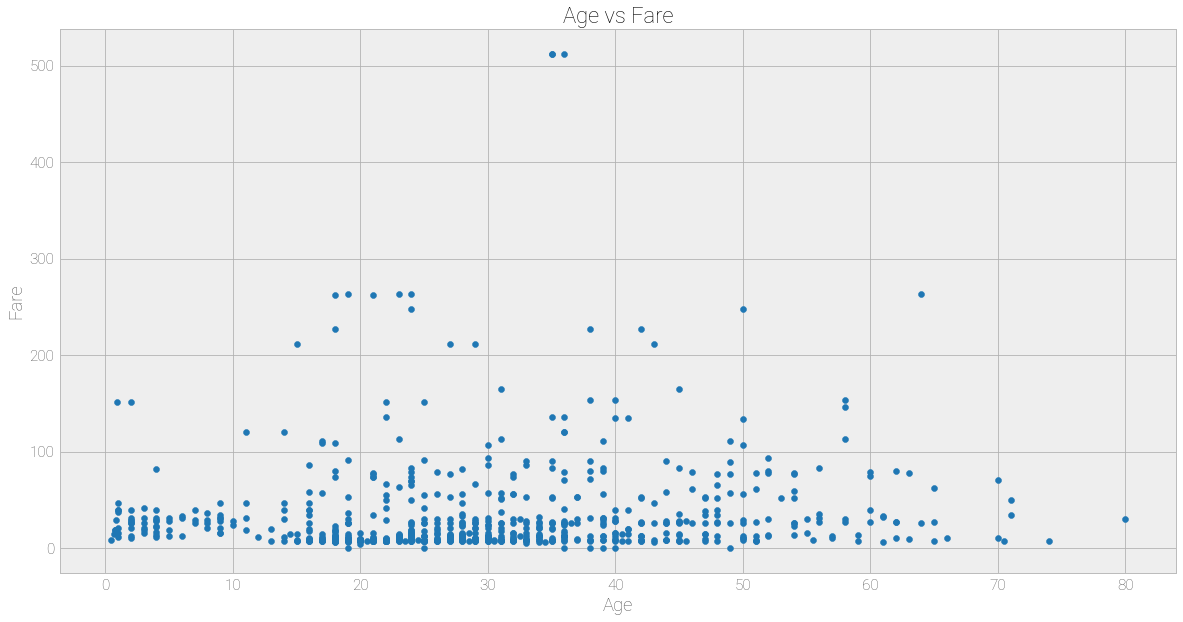

In [14]:
plt_scatter(train, x_col="Age", y_col="Fare")

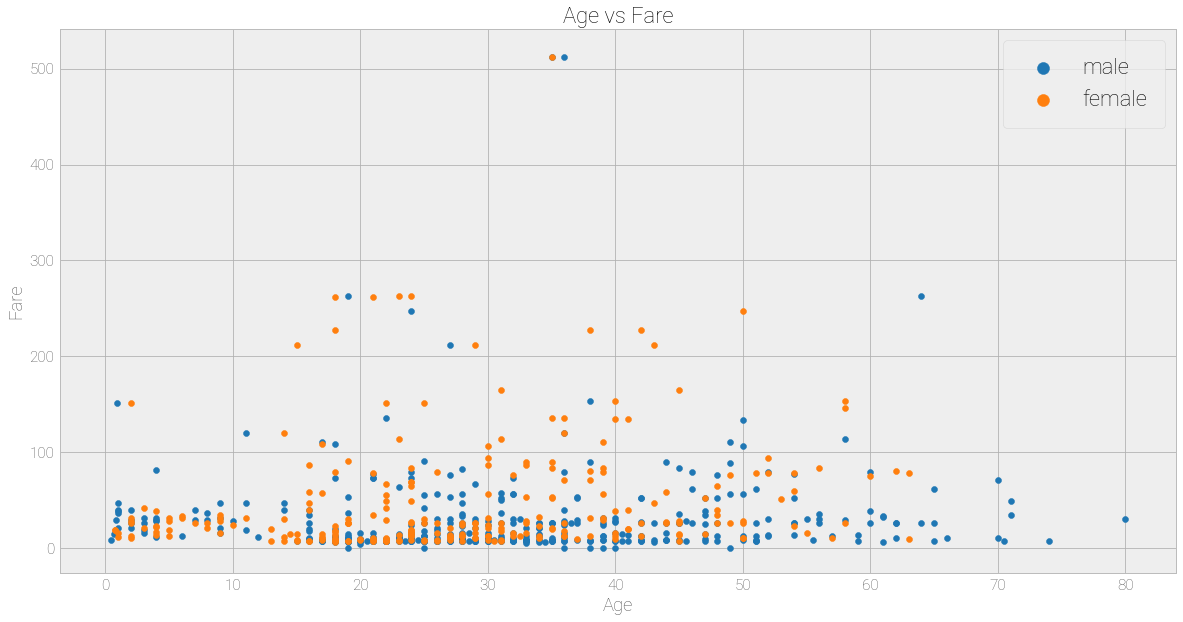

In [15]:
plt_scatter(train, x_col="Age", y_col="Fare", category_col="Sex")

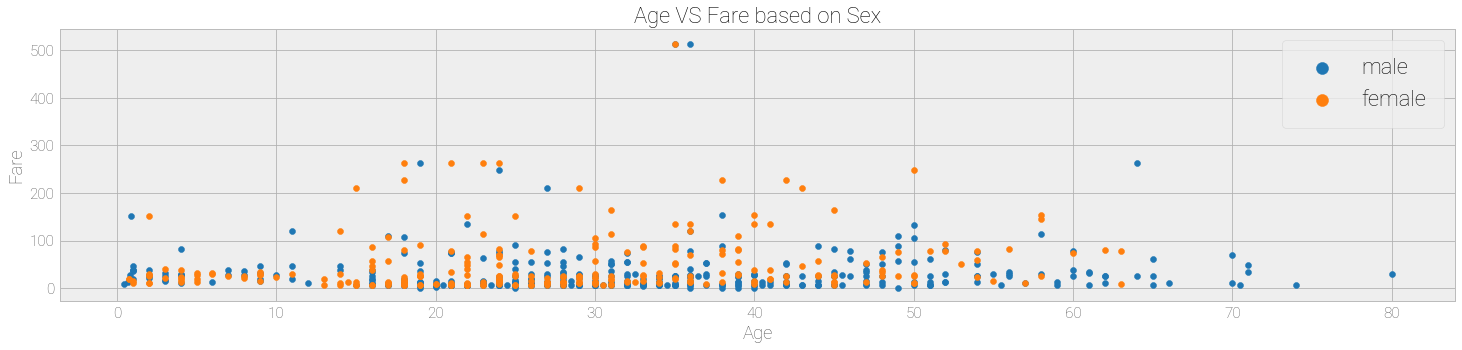

In [16]:
plt_scatter(
    train,
    x_col="Age",
    y_col="Fare",
    category_col="Sex",
    figsize=(25, 5),
    title="Age VS Fare based on Sex",
)

## Histogram

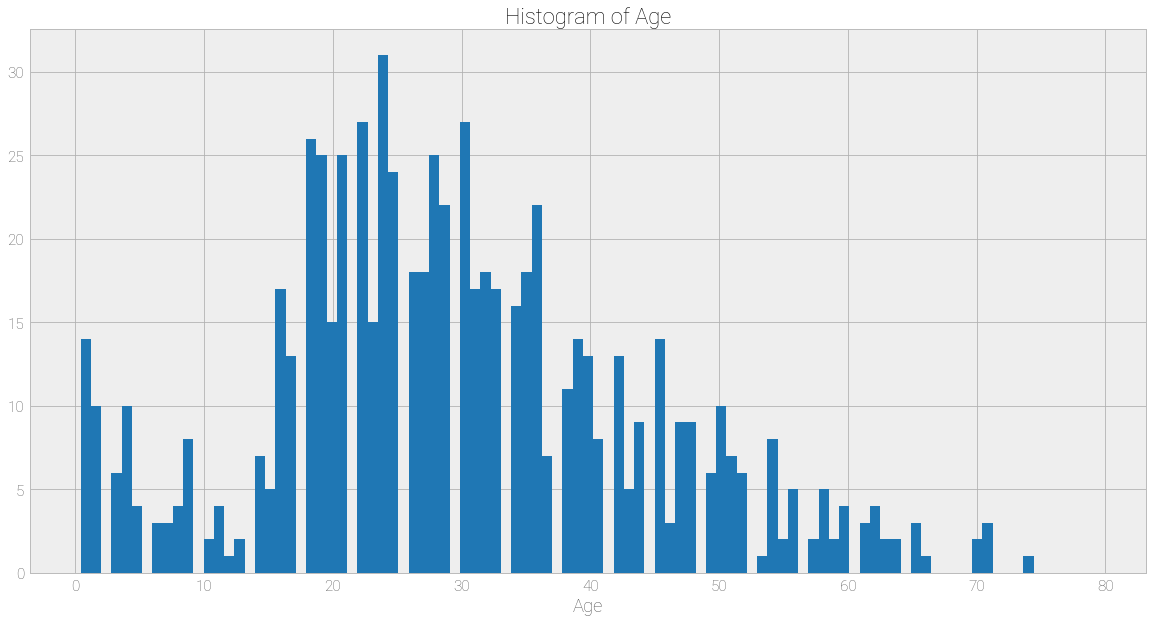

In [17]:
plt_hist(train, "Age")

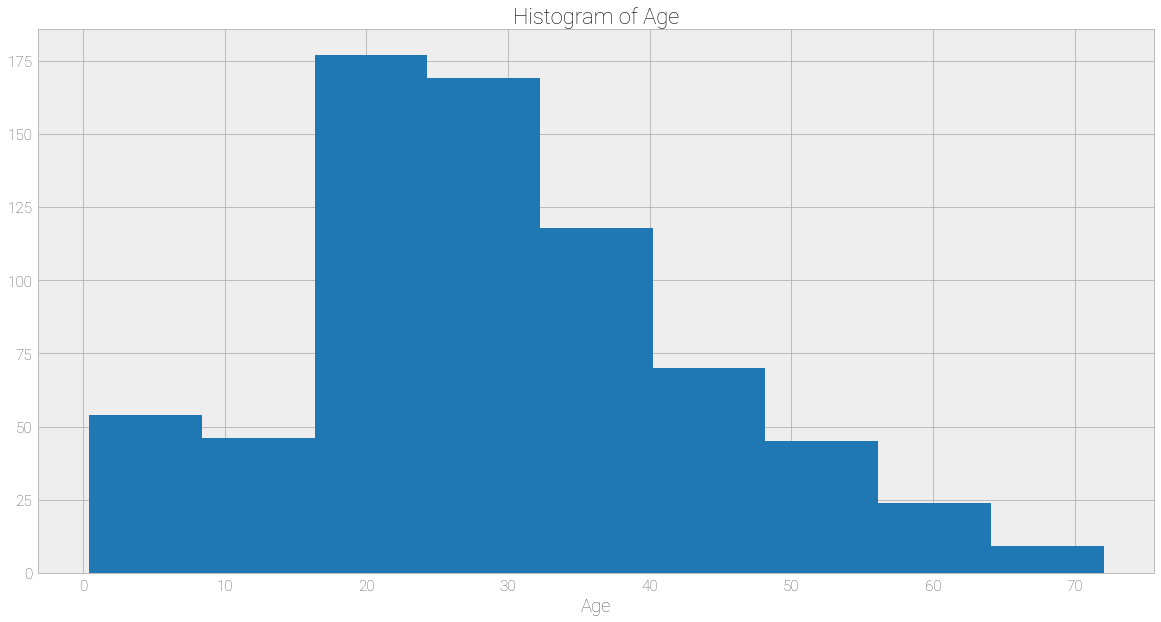

In [18]:
plt_hist(train, "Age", bars=10)  # Default is 100 bars

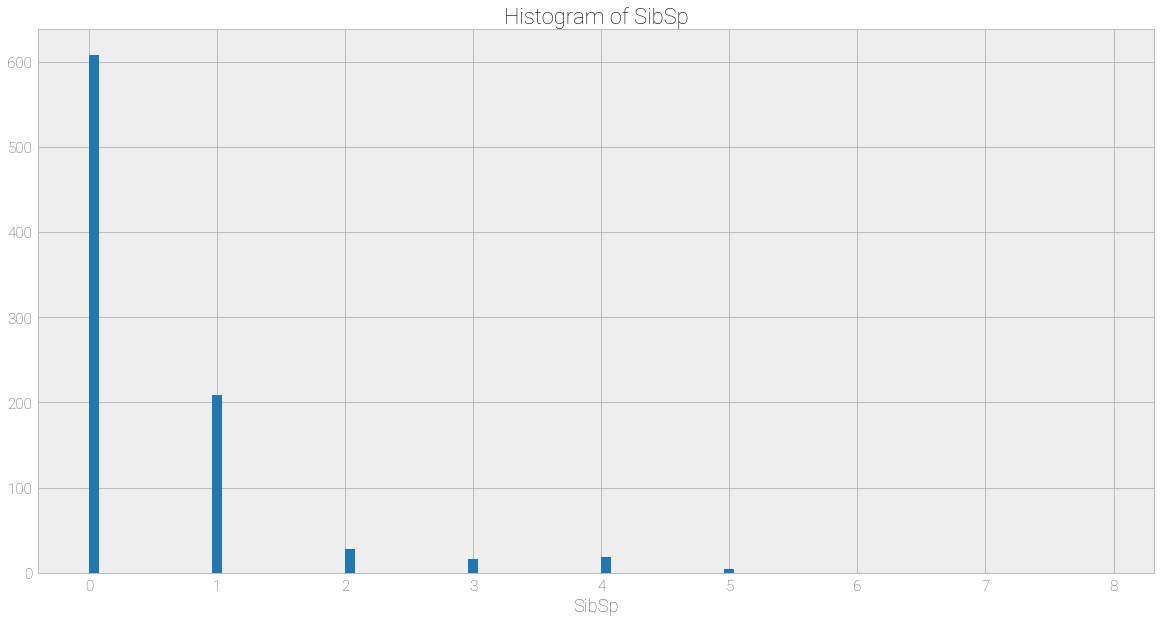

In [19]:
plt_hist(train, "SibSp")

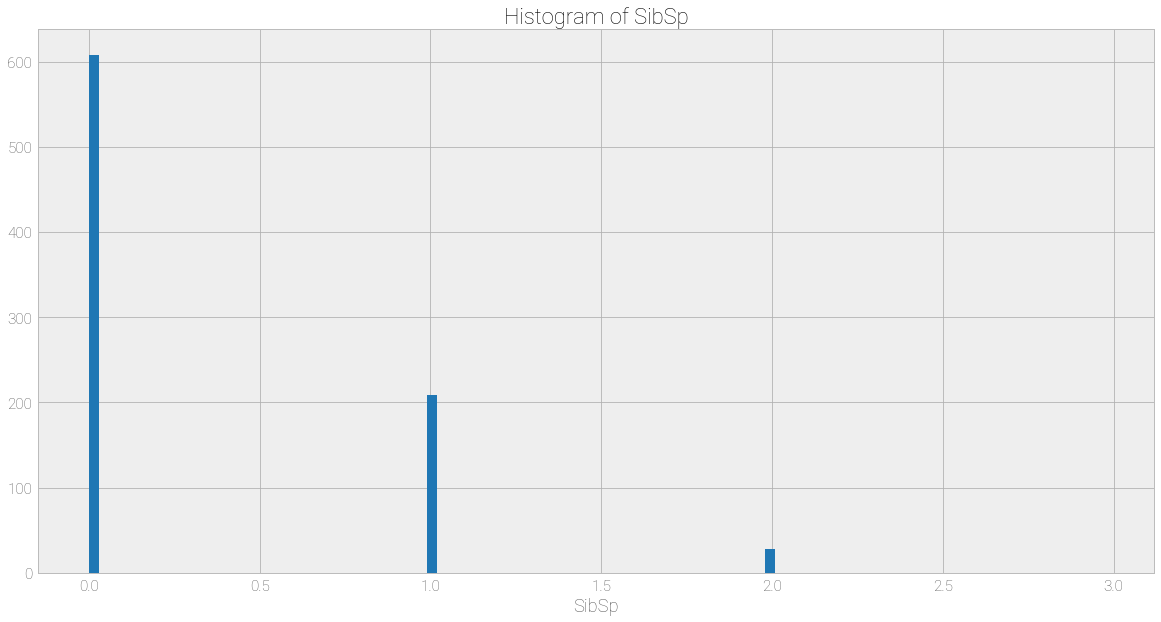

In [20]:
plt_hist(train, "SibSp", quantile=(0.0, 0.95))  # Remove outliers

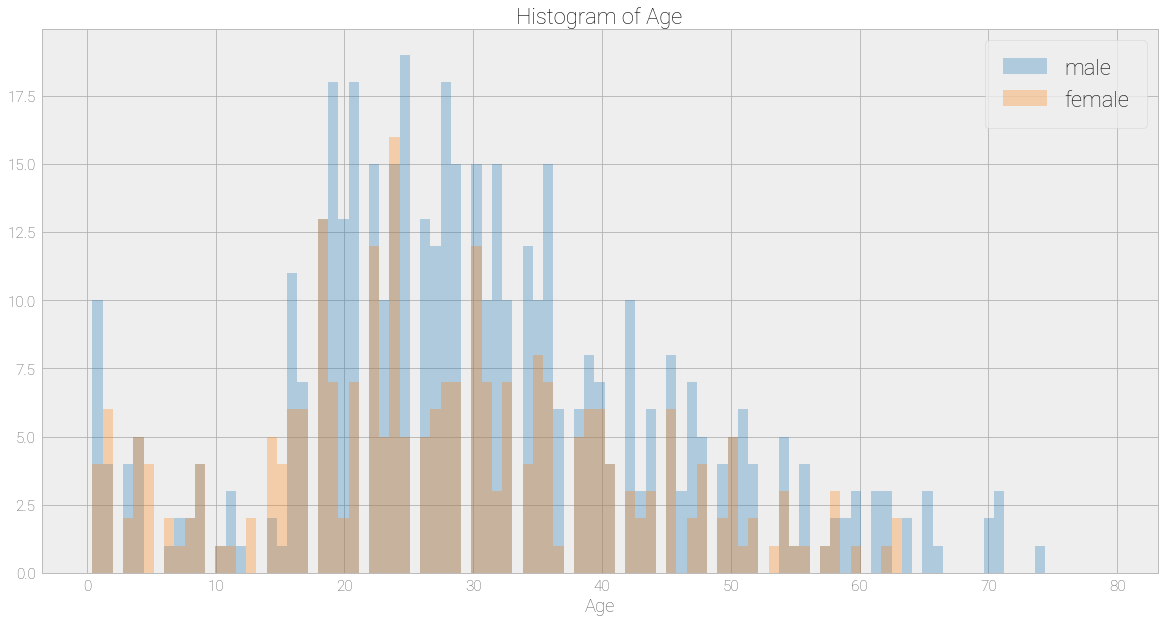

In [21]:
plt_hist(train, "Age", category_col="Sex")

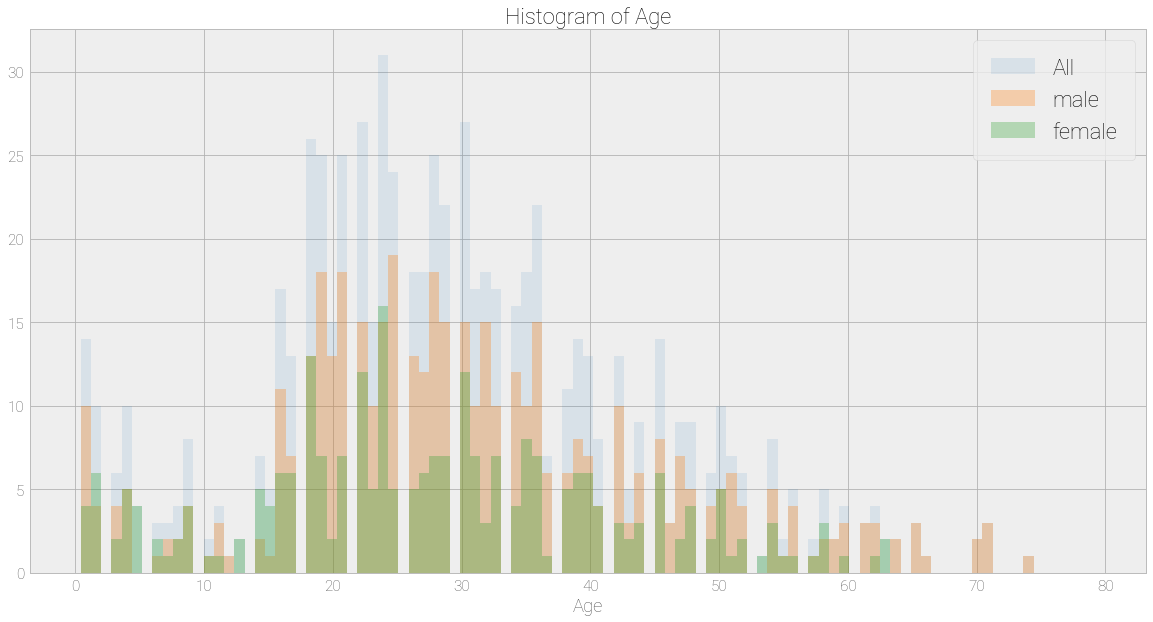

In [22]:
plt_hist(
    train, "Age", category_col="Sex", plot_consolidated=True
)  # Todo: separate axes

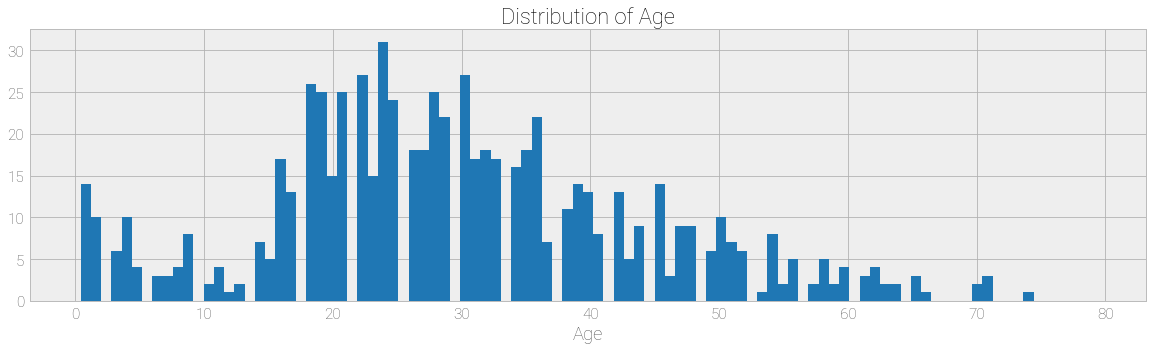

In [23]:
plt_hist(train, "Age", figsize=(20, 5), title="Distribution of Age")

## Box Plot

/home/cdsw/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


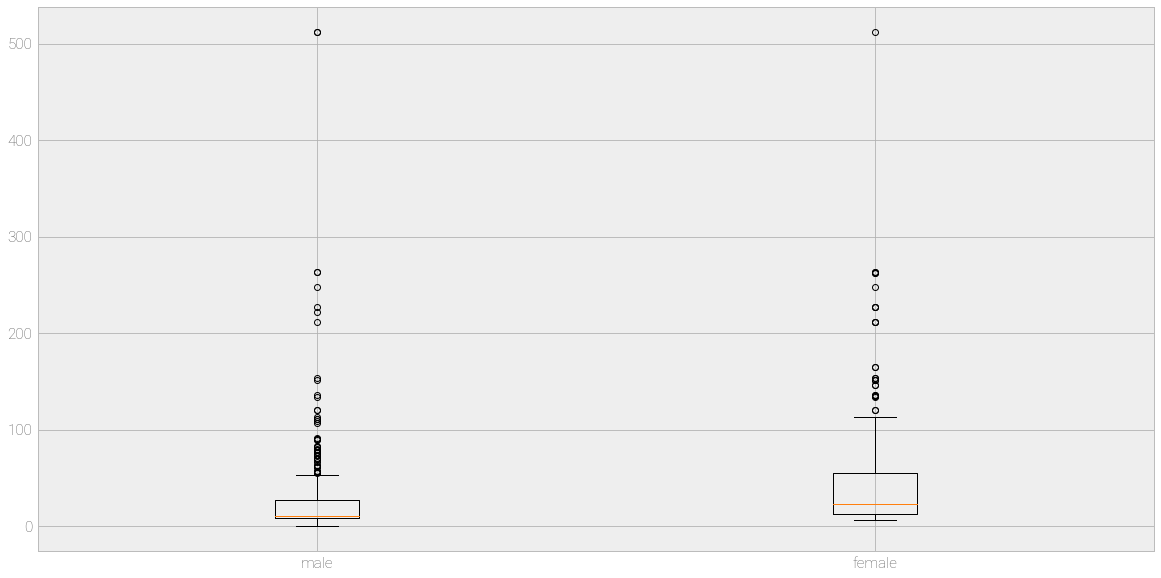

In [24]:
plt_boxplot(train, "Fare", train.Sex)

/home/cdsw/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


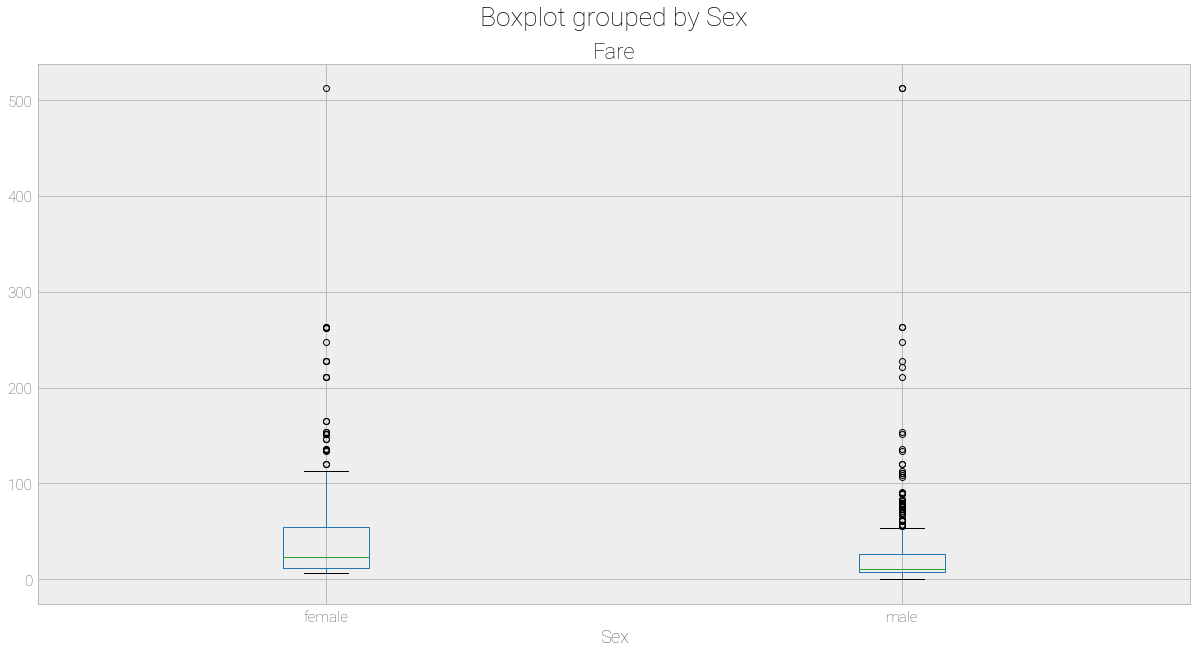

In [25]:
plt_boxplot2(train, "Fare", "Sex", showfliers=True, figsize=(20, 10))

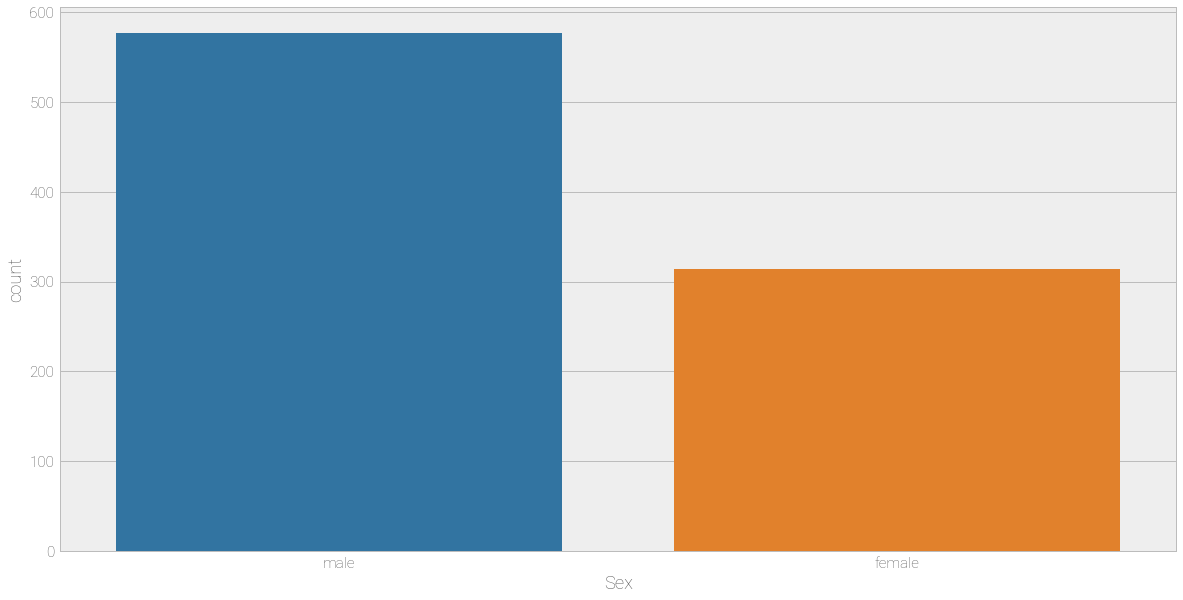

In [26]:
plt_countplot(train, "Sex")

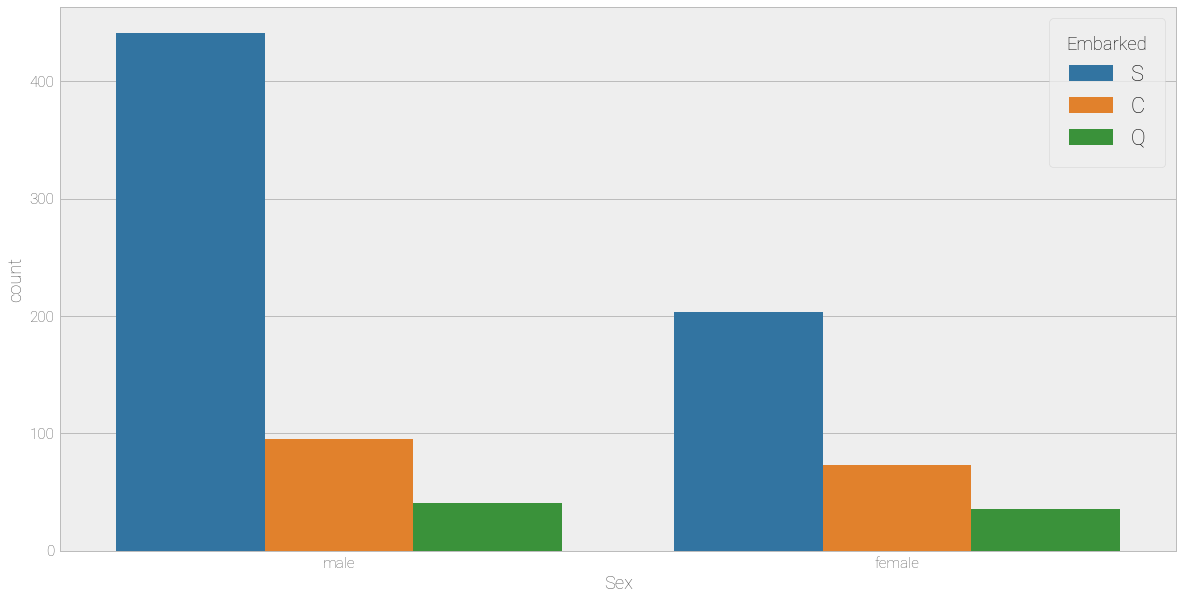

In [27]:
plt_countplot(train, "Sex", hue="Embarked")